In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Rajeev kumar\\Desktop\\Bank customer churn prediction\\data\\bank data.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [6]:
df.isnull().mean() * 100

customer_id         0.0
credit_score        0.0
country             0.0
gender              0.0
age                 0.0
tenure              0.0
balance             0.0
products_number     0.0
credit_card         0.0
active_member       0.0
estimated_salary    0.0
churn               0.0
dtype: float64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.describe(include="object")


,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


<Axes: >

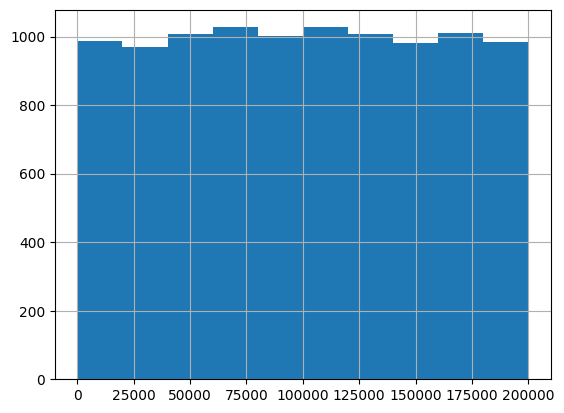

In [10]:
df['estimated_salary'].hist()

In [11]:
(df['age'] < 10).sum()

np.int64(0)

In [12]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

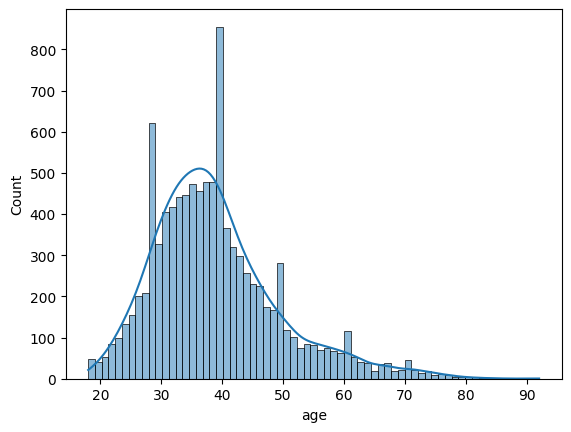

In [13]:
sns.histplot(df['age'], kde=True)

<Axes: xlabel='balance'>

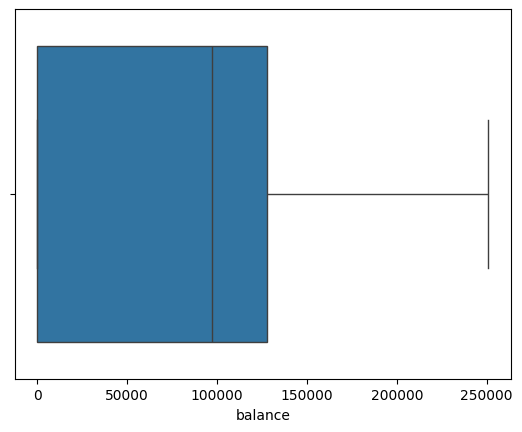

In [14]:
sns.boxplot(x=df['balance'])

<Axes: xlabel='credit_score', ylabel='Count'>

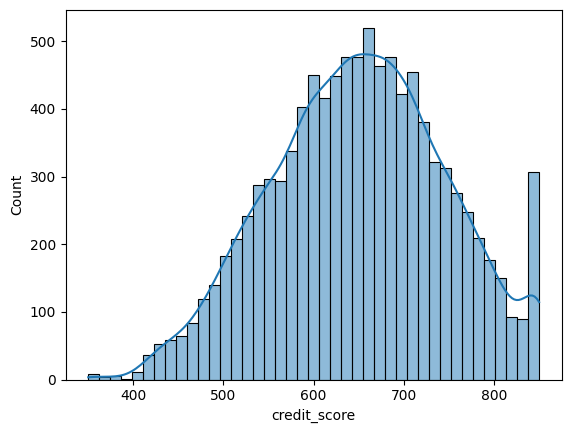

In [15]:
sns.histplot(df['credit_score'], kde=True)

<Axes: xlabel='country'>

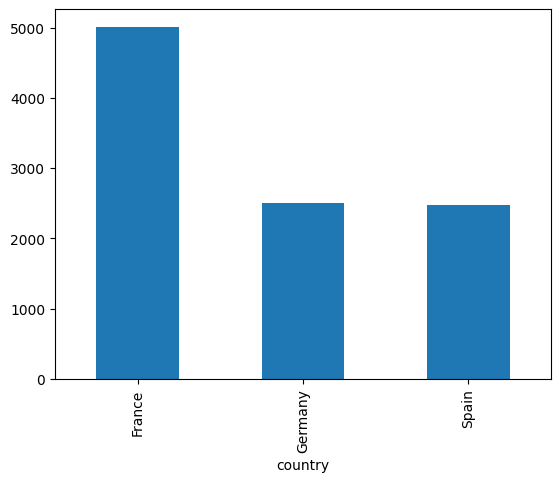

In [16]:
df['country'].value_counts().plot(kind='bar')

<Axes: xlabel='gender'>

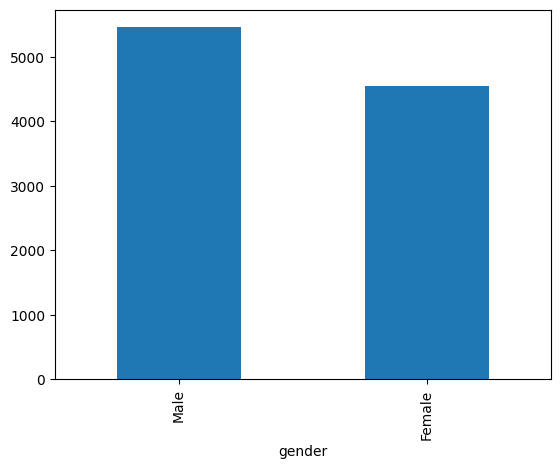

In [17]:
df['gender'].value_counts().plot(kind='bar')

<Axes: xlabel='country'>

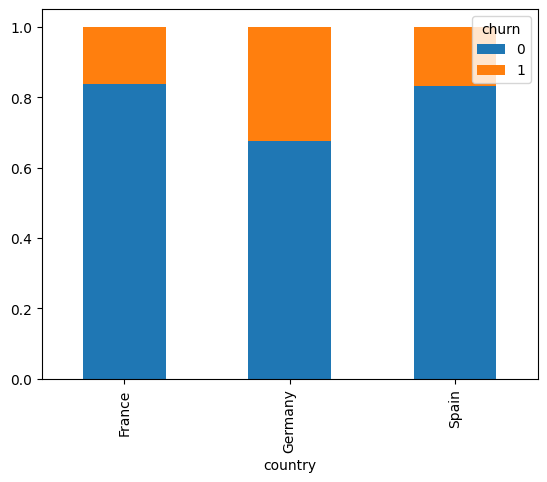

In [18]:
pd.crosstab(df['country'], df['churn'], normalize='index').plot(kind='bar', stacked=True)

<Axes: xlabel='gender'>

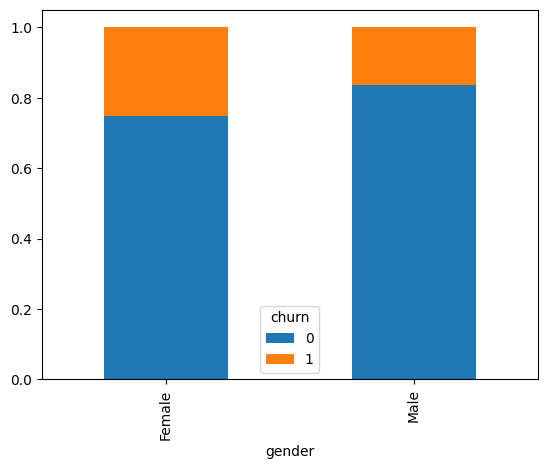

In [19]:
pd.crosstab(df['gender'], df['churn'], normalize='index').plot(kind='bar', stacked=True)

In [20]:
pd.crosstab(df['active_member'], df['churn'], normalize='index')

churn,0,1
active_member,,
0,0.731491,0.268509
1,0.857309,0.142691


In [22]:
#correlation analysis:
df.corr(numeric_only=True)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


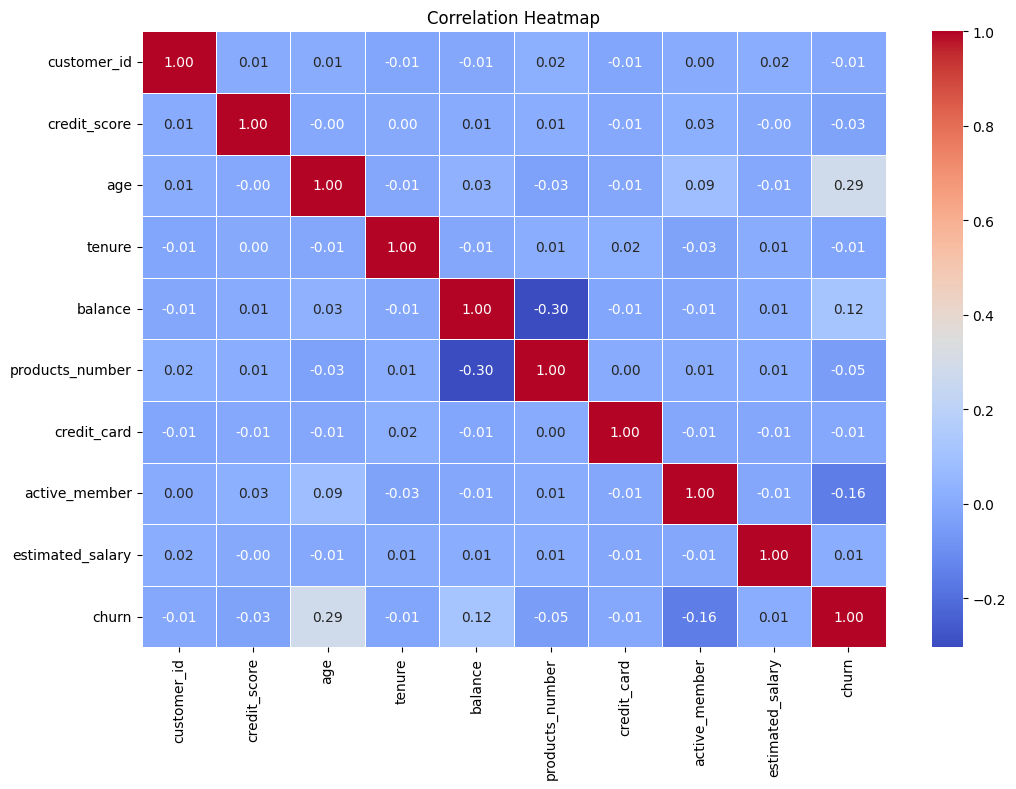

In [ ]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",       
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()
